# <center>Основы оптической спектроскопии</center>

### <center>Кирилл Шохин</center>


### Цель работы
Познакомиться с методами оптической спектроскопии и снять спектры пропускания образцов.
### Комплектация
+ Набор линз
+ Набор светодиодов
+ Оптическая щель
+ Дифракционная решётка
+ Цифровая камера Toupcam scmos00350kpa

### Теория

Соберем спектрометр аналогичный тому, что приведен на схеме ниже, за исключением зеркал. 

    1) От источника свет фокусируется с помощью собирающей линзы и попадает на щель, формируя далее точечный источник излучения.
    2) Затем ставится коллиматорная линза, чтобы преобразовать пучок в параллельный.
    3) Далее идет дифракционная решетка с главным максимум первого порядка, чтобы в достаточной интенсивности работать со спектром.
    4) Осталось найти главный максимум и сфокусировать пучок собирающими линзами,
    5) А затем вывести на матрицу предназначенной для этого камеры.
    6) Теперь уже с помощью необходимого ПО получаем на экране радужную картину, впоследствии, которую переведем в график интенсивности.

Осталось отметить, что вследсвие уравнения дифракционной решетки $d \sin \phi = \lambda$, в каждом из макимумов последней разные длины волн будут находиться под разным углом. Именно поэтому можно получить спектр на детекторе и, впоследствии, на экране.

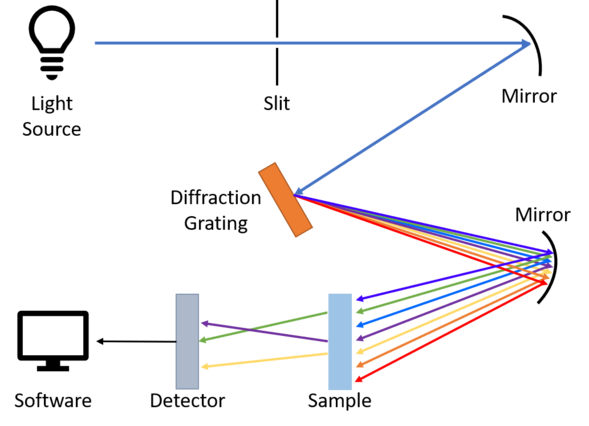

После снятия спектра излучения источника поместим в установку необходимый образец и получим спектр его пропускания. Отношение этих спектров даст коэффициент пропускания. 

### Установка
Установку собирали от источника к камере:

    1) Первым ставился белый светодиод (чтобы калибровать на всем спектре), затем по порядку - 
    2) собирающая линза, чтобы фокус был на щели
    3) сама щель
    4) коллиматорная линза, таким образом, чтобы на метровом расстоянии оставалась узкая точка
    5) дифракционная решетка (ловим главный максимум)
    6) две собирающие линзы, так как оптической силы одной не хватало
    7) и, наконец, полсантиметровая матрица камеры, таким образом, чтобы весь спектр на ней поместился.


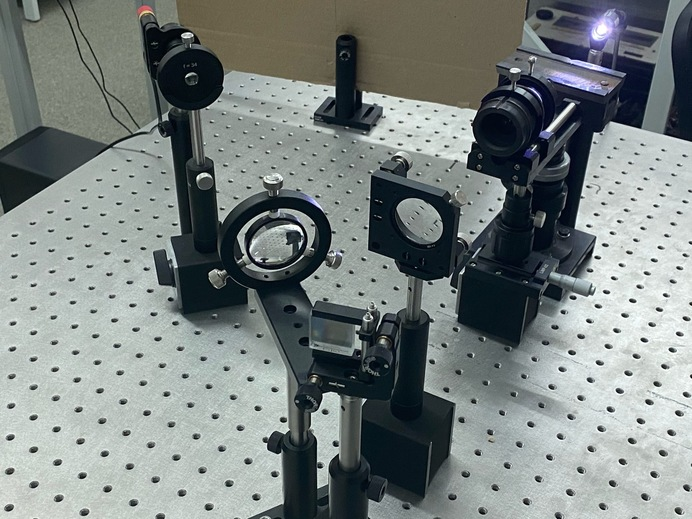

Сборка окончена, можно приступать к эксперименту.

### Эксперимент
    1) Калибровка на лазерах с известными длинами волн
    2) Снятие спектров трех разных стеклянных пластин (источник: белый светодиод)
    3) Снятие спектров четырех солей (источник: белый светодиод)

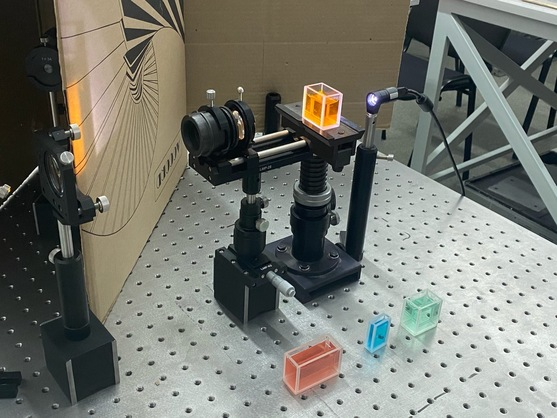

Теперь уже дома, под горячий чай, можно приступать к обработке.

### Загрузка данных


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from numpy import linalg as la
path = r'C:\Users\Кириши\Desktop\Лабы\Спектр'
files = os.listdir(path)

In [2]:
data = pd.DataFrame()
for i in range(len(files)):
    data[files[i][:-4]] = pd.read_csv(os.path.join(path, files[i]), delimiter = "\t", header=None)[3]
data

,CoCl3,CuSO4,data_520(1),data_520(2),data_520(3),data_520(4),data_520(5),data_532(1),data_532(2),data_532(3),...,white(2),white(3),white(4),white(5),white(6),white(7),white(8),white(9),white_final,white_true
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
635,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
636,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
637,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Для начала построим все имеющиеся графики для лучшего понимания данных.

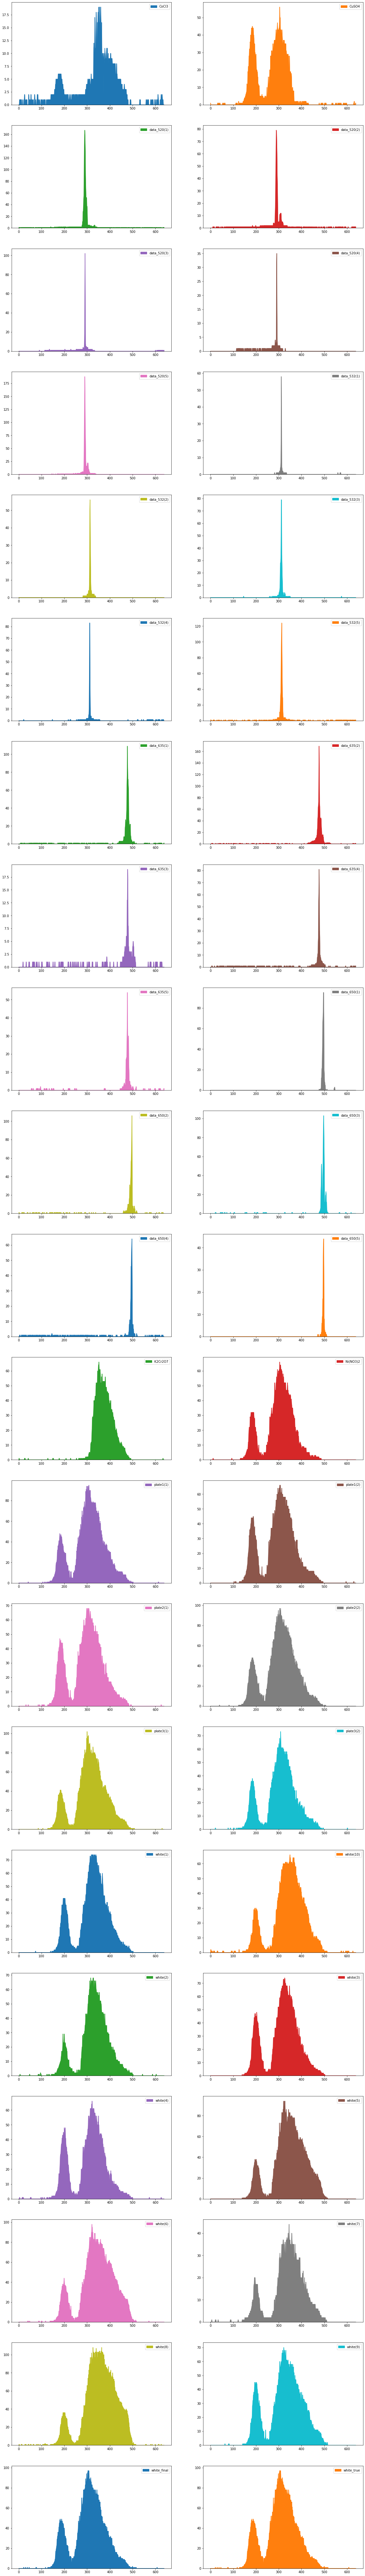

In [3]:
data.plot.area(subplots=True, figsize=(20, 150), layout=(21, 2), sharex=False)
plt.show()

Итак, имеем:
+ 20 калибровочных спектров лазеров (четыре длины волны по 5 измерений каждой)
+ интесивности спектров солей 
+ интесивности спектров стеклянных пластин

    от номера пикселя матрицы камеры.

__Примечание:__ матрица камеры измеряет интенсивность в своих единицах, за ненадобностью оставим их в анонимах.

Все графики снимались в одинаковых условиях, а установка позволяет с высокой точностью утверждать, что слева-направо линейно растет длина волны, потому нужно просто сделать линейное отображение по четырем точкам. Настало время калибровки.

### Калибровка
Первым делом получим матрицу пиковых значений спектров калибровочных лазеров.

In [4]:
peaks = np.zeros((5, 4))
for i in range(5):
    peaks[i][0] = np.argmax(data['data_520({})'.format(i+1)])
    peaks[i][1] = np.argmax(data['data_532({})'.format(i+1)])
    peaks[i][2] = np.argmax(data['data_635({})'.format(i+1)])
    peaks[i][3] = np.argmax(data['data_650({})'.format(i+1)])
peaks

array([[290., 311., 477., 496.],
       [289., 313., 477., 497.],
       [291., 311., 478., 497.],
       [291., 311., 477., 497.],
       [290., 313., 477., 497.]])

Усредняем по вертикали (дабы узнать средние значения пиков для каждой длины лазера) и получаем 4 уравнения с 2 неизвестными. Избыток данных повысит точность. 

$$Ax=y$$

In [5]:
A = np.hstack((np.mean(peaks, 0).reshape(-1, 1), np.ones((4, 1))))
y = [520, 532, 635, 650]
A, np.reshape(y, (-1, 1))

(array([[290.2,   1. ],
        [311.8,   1. ],
        [477.2,   1. ],
        [496.8,   1. ]]),
 array([[520],
        [532],
        [635],
        [650]]))

Вручную выберем несколько пар и усредним выходные коэффициенты.

In [6]:
k, b = (la.solve(A[::2], y[::2])+
        la.solve(A[::3], y[::3])+
        la.solve(A[1:3], y[1:3])+
        la.solve(A[1::2], y[1::2]))/4
k, b

(0.6261947765219864, 337.4711945761536)

Осталось отмасштабировать и вывести нужные графики

In [7]:
x = np.arange(len(data))*k + b
data['Длина волны, нм'] = x

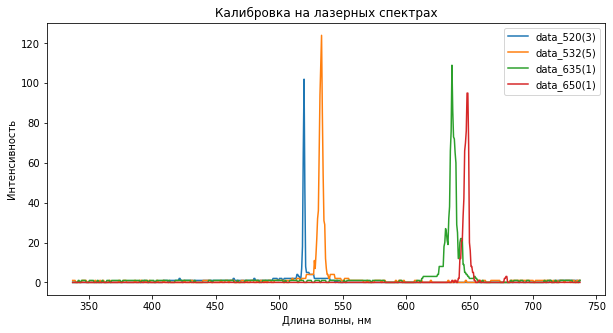

In [8]:
data[['data_520(3)','data_532(5)',
      'data_635(1)','data_650(1)',
      'Длина волны, нм']].plot(figsize=(10,5), x='Длина волны, нм')
plt.ylabel('Интенсивность')
plt.title('Калибровка на лазерных спектрах')
plt.show()

### Белый светодиод

Далее рассмотрим спектр белого светодиода, который был источником излучения для снятия всех
спектров пропускания.

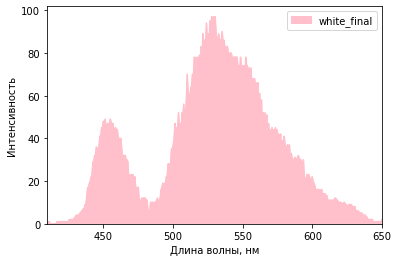

In [9]:
data[['white_final','Длина волны, нм']].plot.area(x='Длина волны, нм',
                    xlim=[410, 650], color='pink').set(ylabel='Интенсивность')
plt.show()

Неоднородность интенсивности белого светодиода может объясняться двумя причинами:
+ Потери в установке
+ Данный светодиод дейтсвительно имеет такой спектр излучения

### Стеклянные пластинки

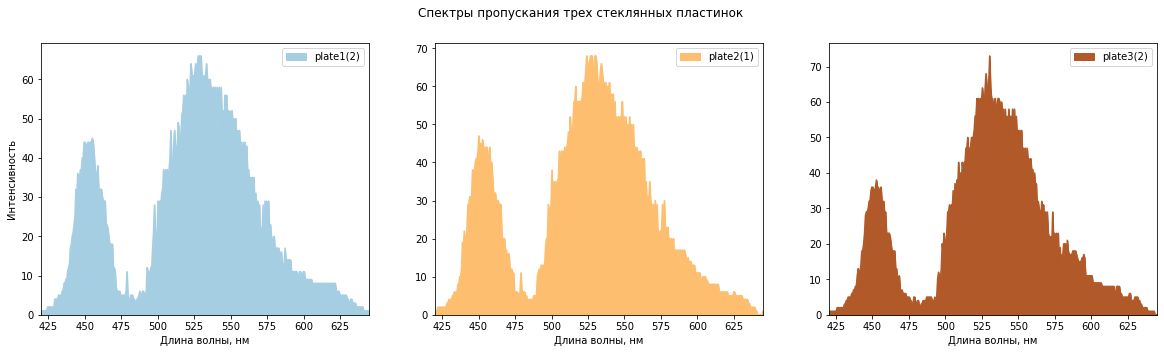

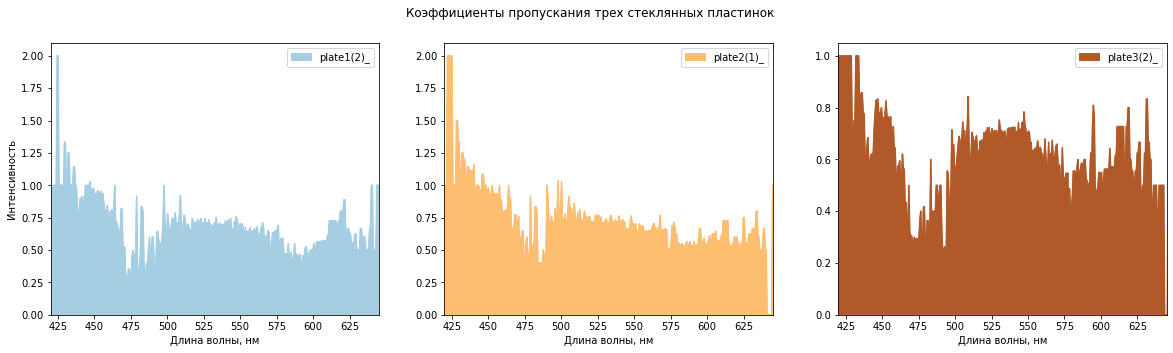

In [10]:
data[['plate1(2)','plate2(1)','plate3(2)','Длина волны, нм']].plot.area(colormap='Paired',
    x='Длина волны, нм', subplots=True, figsize=(20, 5), layout=(1, 3), xlim=[420,645], sharex=False,
    title='Спектры пропускания трех стеклянных пластинок')[0][0].set(ylabel='Интенсивность')

data['plate1(2)_'] = data['plate1(2)']/data['white_final']
data['plate2(1)_'] = data['plate2(1)']/data['white_final']
data['plate3(2)_'] = data['plate3(2)']/data['white_final']

data[['plate1(2)_','plate2(1)_','plate3(2)_','Длина волны, нм']].plot.area(colormap='Paired',
    x='Длина волны, нм', subplots=True, figsize=(20, 5), layout=(1, 3), xlim=[420,645], sharex=False,
    title='Коэффициенты пропускания трех стеклянных пластинок')[0][0].set(ylabel='Интенсивность')
plt.show()

### Соли

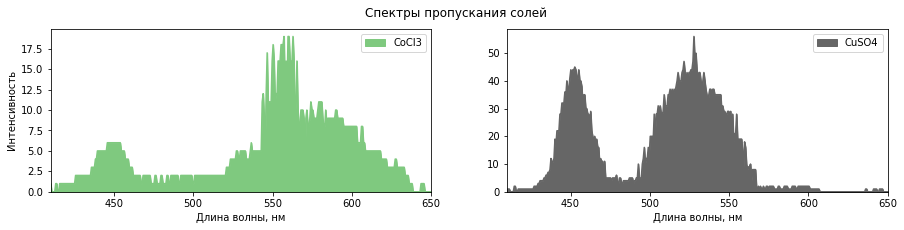

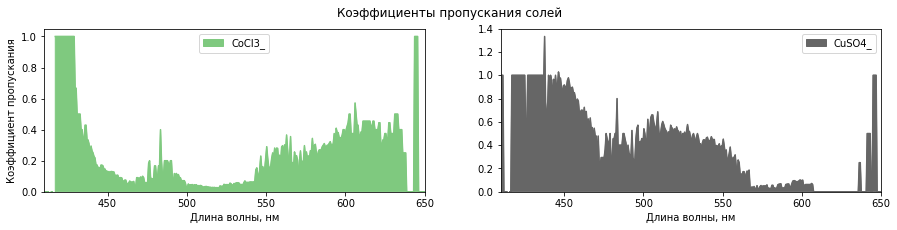

In [11]:
data[['CoCl3', 'CuSO4', 'Длина волны, нм']].plot.area(colormap='Accent',
    x='Длина волны, нм', subplots=True, figsize=(15, 3), layout=(1, 2), xlim=[410,650],
        sharex=False, title='Спектры пропускания солей')[0][0].set(ylabel='Интенсивность')

data['CoCl3_'] = data['CoCl3']/data['white_final']
data['CuSO4_'] = data['CuSO4']/data['white_final']

data[['CoCl3_', 'CuSO4_', 'Длина волны, нм']].plot.area(colormap='Accent',
    x='Длина волны, нм', subplots=True, figsize=(15, 3), layout=(1, 2), xlim=[410,650],
    sharex=False, title='Коэффициенты пропускания солей')[0][0].set(ylabel='Коэффициент пропускания')
plt.show()

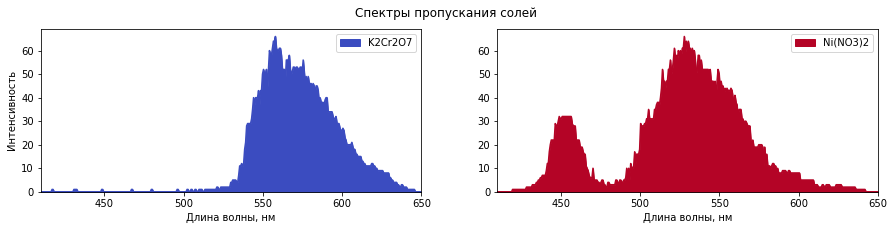

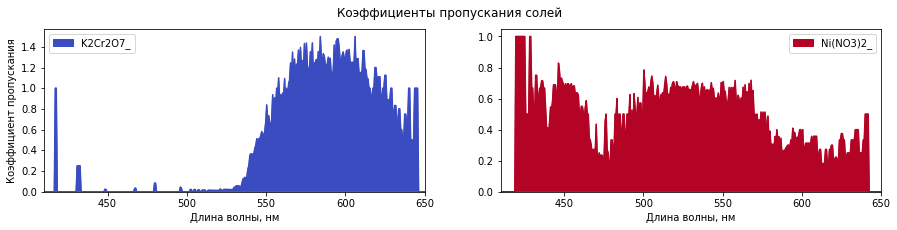

In [28]:
data[['K2Cr2O7', 'Ni(NO3)2', 'Длина волны, нм']].plot.area(colormap='coolwarm',
    x='Длина волны, нм', subplots=True, figsize=(15, 3), layout=(1, 2), xlim=[410,650],
        sharex=False, title='Спектры пропускания солей')[0][0].set(ylabel='Интенсивность')

data['K2Cr2O7_'] = data['K2Cr2O7']/data['white_final']
data['Ni(NO3)2_'] = data['Ni(NO3)2']/data['white_final']

data[['K2Cr2O7_', 'Ni(NO3)2_', 'Длина волны, нм']].plot.area(colormap='coolwarm',
    x='Длина волны, нм', subplots=True, figsize=(15, 3), layout=(1, 2), xlim=[410,650],
    sharex=False, title='Коэффициенты пропускания солей')[0][0].set(ylabel='Коэффициент пропускания')
plt.show()

Итак, можно наблюдать существенное различие пропускающих способностей материалов при разных частотах светового спектра, например, $K_2 Cr_2 O_7$ совершенно не пропускает голубой цвет.